### Sample program for Random Forest Classifier  

#### Import libraries  

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from joblib import dump

#### Parameters  

In [18]:
csv_in = 'ai-12-quiz.csv'

In [19]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(350, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c1      350 non-null    float64
 1   c2      350 non-null    float64
 2   c3      350 non-null    float64
 3   c4      350 non-null    float64
 4   type    350 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.8+ KB
None


,c1,c2,c3,c4,type
0,5.22,8.61,1.60,0.13,t1
1,3.80,8.05,1.70,0.06,t1
2,3.66,6.85,-1.59,0.28,t1
3,2.14,7.55,-0.38,-0.25,t1
4,3.99,8.57,1.16,-1.50,t1


#### Drop rows with missing value at Age and Embarked columns  

#### Extract data  

In [20]:
df_X= df.loc[:, 'c1':'c4']
df_X = pd.get_dummies(df_X, drop_first=True)
ser_y = df['type']

In [21]:
print(df_X.shape)
print(df_X.info())
display(df_X.head())
print(ser_y.shape)
print(ser_y.head())

(350, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c1      350 non-null    float64
 1   c2      350 non-null    float64
 2   c3      350 non-null    float64
 3   c4      350 non-null    float64
dtypes: float64(4)
memory usage: 11.1 KB
None


,c1,c2,c3,c4
0,5.22,8.61,1.60,0.13
1,3.80,8.05,1.70,0.06
2,3.66,6.85,-1.59,0.28
3,2.14,7.55,-0.38,-0.25
4,3.99,8.57,1.16,-1.50


(350,)
0    t1
1    t1
2    t1
3    t1
4    t1
Name: type, dtype: object


#### Grid search (n_estimators, max_Depth of RF)  

In [22]:
rfc=RandomForestClassifier(random_state=0)            

# Hyper paramet settings for grid search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth' : [2, 4, 6, None],
}

In [23]:
grid_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=29)
gen_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=31)

In [24]:
gs = GridSearchCV(rfc, param_grid , cv=grid_cv, scoring='accuracy')

In [25]:
%%time
nested_score = cross_val_score(gs, X=df_X, y=ser_y, cv=gen_cv,
                               scoring='accuracy')
print(nested_score)
print(nested_score.mean())

[0.94318182 0.96590909 0.96551724 0.90804598]
0.9456635318704285
CPU times: user 16.9 s, sys: 112 ms, total: 17.1 s
Wall time: 17.1 s


In [26]:
%%time
gs.fit(df_X, ser_y)
gs_best = gs.best_estimator_

CPU times: user 4.25 s, sys: 23.9 ms, total: 4.28 s
Wall time: 4.28 s


In [27]:
for k,v in gs_best.get_params(deep=True).items():
    print(k, '->', v)

bootstrap -> True
ccp_alpha -> 0.0
class_weight -> None
criterion -> gini
max_depth -> 6
max_features -> auto
max_leaf_nodes -> None
max_samples -> None
min_impurity_decrease -> 0.0
min_impurity_split -> None
min_samples_leaf -> 1
min_samples_split -> 2
min_weight_fraction_leaf -> 0.0
n_estimators -> 50
n_jobs -> None
oob_score -> False
random_state -> 0
verbose -> 0
warm_start -> False


In [28]:
print(pd.Series(gs_best.feature_importances_, index=df_X.columns))

c1    0.345185
c2    0.480157
c3    0.130973
c4    0.043685
dtype: float64


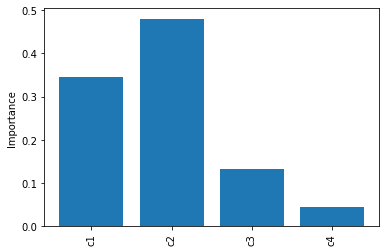

In [29]:
plt.bar(df_X.columns, gs_best.feature_importances_)
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()